# Project 2: Business Statistics: Axis Insurance

## Description

Objective – Statistical Analysis of Business Data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

### You are expected to do the following:

1/ Explore the dataset and extract insights using Exploratory Data Analysis.

2 /Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? [Hint- Formulate a hypothesis and prove/disprove it]

3/ Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

4/ Is the proportion of smokers significantly different across different regions? [Hint : Create a contingency table/cross tab, Use the function : stats.chi2_contingency()]

5/ Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

*Consider a significance level of 0.05 for all tests.

### Context 

Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

### Data Dictionary 

Age -   This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).

Sex -   This is the policy holder's gender, either male or female.

BMI -   This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.

Children - This is an integer indicating the number of children / dependents covered by the insurance plan.

Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.

Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.

Charges - Individual medical costs billed to health insurance


### Load the necessary libraries for data analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(color_codes = True)
import scipy.stats as stats

### Note: Further statistical testing functions will be imported after the EDA for clarity

### Read the dataframe CSV file

In [3]:
data = pd.read_csv('insurance.csv')

### Review the dataframe for size, shape, datatypes, missing values, and make read for further analysis

In [4]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
data.shape

(1338, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### The dataframe above has columns that need dtype "object" changed to "category." But there appears to be no "missing" values.

In [8]:
data.describe(include='all') # include = 'all' provides some info on non-numeric data as well, eg. counts, uniques, top freq..

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### Converting "object" to "category"

In [9]:
data['sex'] = data['sex'].astype('category')

In [10]:
data['smoker'] = data['smoker'].astype('category')

In [11]:
data['region'] = data['region'].astype('category')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


In [13]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Reviewing again for no missing values

In [14]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### No null values seem to be present

### Reviewing counts of sex, children, smokers, regions

In [15]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

#### Of a total sample size of 1338, there are 676 males and 662 females, almost a balanced sample.

In [16]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

#### In 1338 policy holders, 574 have no children, 324 have 1 child, 240 have 2 children, 157 have 3 children, 25 have 4 children, and 18 have 5 children. We don't have data on 'couples,' we'll need to treat each policy holder as an individual.

In [17]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

#### Of 1338 policy holders, 1024 do not smoke, and 274 do smoke. In multivariate, we'll look at smoke/don't smoke by different factors, in line with the statistical questions posed.

In [18]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

#### In the 1338 lines, the region counts are reasonably equal with southeast a little higher with 364, but southwest, northwest and northeast with 325, 325 and 324 respectively. Simple per capita ratios of different values could be seen graphically if we are comparing regions, but then statiscal methods could be employed to confirm against our hypotheses for deeper analysis.

In [19]:
data.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

#### In checking the skewness above, 'age' has a slight right skew, but is close to being normally distributed (skewness = 0), 'bmi', 'children' and 'charges' become more right-skewed, in that order, and later we'll need to investigate outliers on 'charges' with a skew of 1.515.

## Creating some graphical plots for univariate analysis

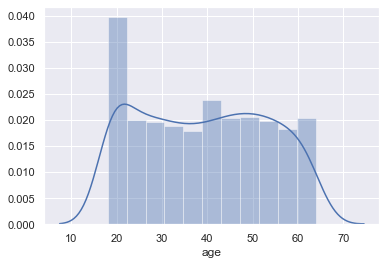

In [20]:
sns.distplot(data['age']);

#### For interest sake, the Shapiro-Wilk test evaluates a data sample and quantifies how likely the sample is drawn from a Gaussian/Normal distribution (one text suggests good for small number of data points, reasonable results for n<2000);

In [21]:
from scipy.stats import shapiro
stat, p = shapiro(data['age'])
print('Statistics=', stat, 'p=', p)

Statistics= 0.9446991682052612 p= 5.687479624670986e-22


#### Except for peak when people can enter the plan at legal age, the rest of the distribution up to 64 is more 'uniform' in nature, and the very low 'p' value above suggests not normal.

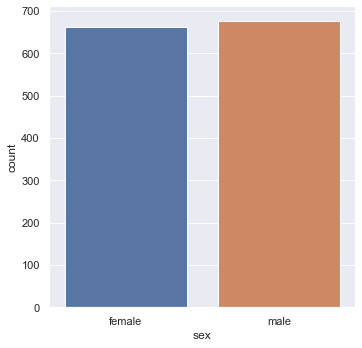

In [22]:
sns.catplot(x = 'sex', data = data, kind = 'count');

#### From previous, of a total sample size of 1338, there are 676 males and 662 females, almost a balanced sample.

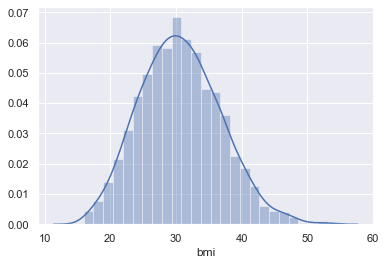

In [23]:
sns.distplot(data['bmi']);

####  The 'bmi' is a continous variable and appears more 'normally' distributed, but with a higher peak.

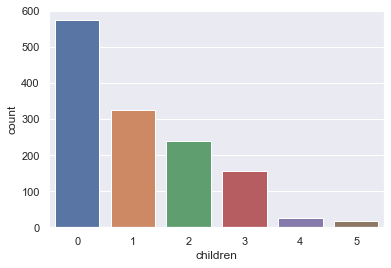

In [24]:
sns.countplot(data['children'])
plt.show()

#### In 1338 policy holders, 574 have no children, 324 have 1 child, 240 have 2 children, 157 have 3 children, 25 have 4 children, and 18 have 5 children. We don't have data on 'couples' or 'family plan' data, we'll need to treat each policy holder as an individual. The mean number of children per policy holder is 1.095.

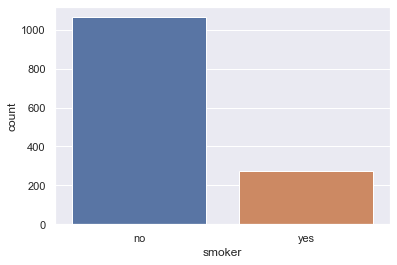

In [25]:
sns.countplot(data['smoker']);

#### Of 1338 policy holders, 1024 do not smoke, and 274 do smoke.

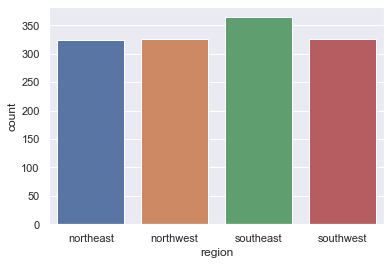

In [26]:
sns.countplot(data['region']);

#### In the 1338 lines, the region counts are reasonably equal with southeast a little higher with 364, but southwest, northwest and northeast with 325, 325 and 324 respectively.

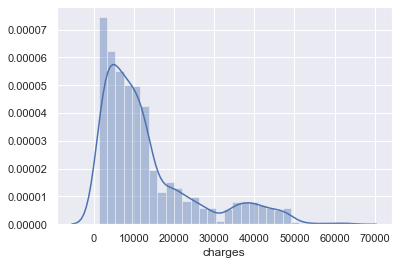

In [27]:
sns.distplot(data['charges'])
plt.show()

#### The variable 'charges' is more right-skewed at a skew value of 1.515, we'll investigate outliers on 'charges' following.

In [28]:
#  just to investigate, 
from scipy.stats import kurtosis
stats.kurtosis(data['charges'])

1.595821363956751

#### Looking for outliers in 'age', 'bmi', and 'charges'

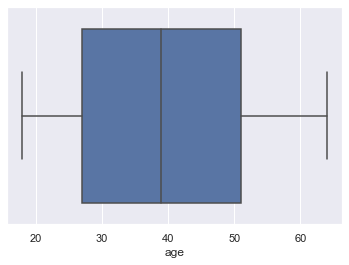

In [29]:
sns.boxplot(data['age']);

#### As expected, we have no outliers beyond the 'whiskers,' Q1 at 27, median at 39 and Q3 at 51, IQR=24, min=18 and max=64, given insurance policy entrance age and excluding >64.

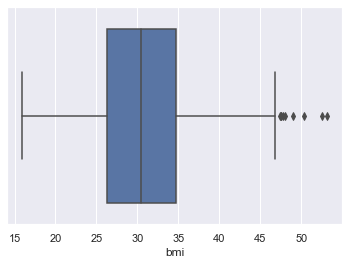

In [30]:
sns.boxplot(data['bmi']);

#### We have several outliers above the 1.5*IQR, with a maximum of 53.13 body mass index. If the ideal BMI is between 18.5 to 24.9, then this boxplot 'graphically' shows a very obese sample of the population - or if indicative of the population, then weight loss and daily exercise is required. (IMHO) 

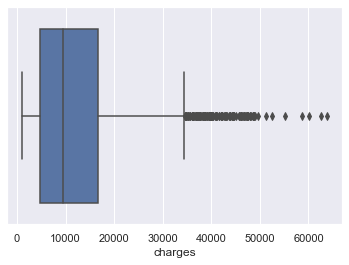

In [31]:
sns.boxplot(data['charges']);

#### There are a significant number of outliers in 'charges,' and these could be of interest to an insurance company to mitigate and/or set the fees for policy holders on 'age,' 'sex,' 'smoking,' and perhaps 'bmi.'  With the right-skewness shown previously, and sample mean of 13270 and median of 9382, std of 12110, we genuinely see the extent of the outliers in charges.

## Creating graphical plots for multivariate analysis

In [32]:
data.cov()

,age,bmi,children,charges
age,197.401387,9.362337,0.719303,5.087480e+04
bmi,9.362337,37.187884,0.093795,1.464730e+04
children,0.719303,0.093795,1.453213,9.926742e+02
charges,50874.802298,14647.304426,992.674197,1.466524e+08


In [33]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Creating a heatmap of above for executive presentation and looking for strong correlations; minor on age and charges, as expected.

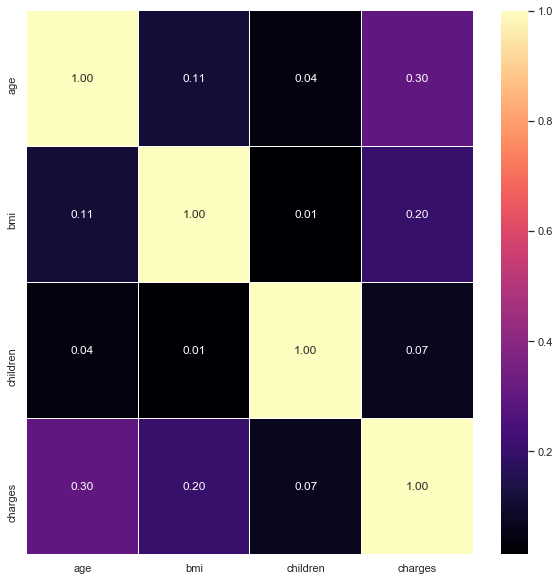

In [34]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(), ax=ax, annot = True, linewidths = 0.05, fmt ='0.2f', cmap = 'magma')
plt.show()

### Only 'age' with charges', and 'bmi' with charges' shows a low to moderate correlation of 0.30 and 0.20 respectively.  

### Looking at pairplots for other possible relationships between variables

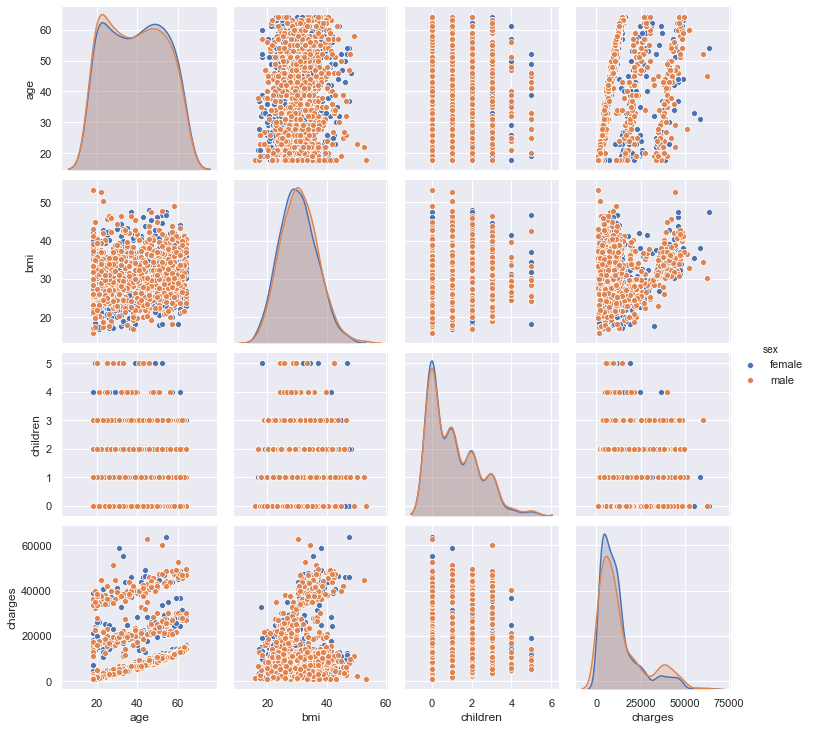

In [35]:
sns.pairplot(data, hue = 'sex')
plt.show()

#### Of interest to statistical questions, the 'bmi' distribution of females is very similar to that of males. And for 'charges', more females charges are in the lower cost part of the right-skewed distribution, while in the higher cost right-tail, we have more males. We'll also look at the "banding" in 'charges' versus 'age'. 

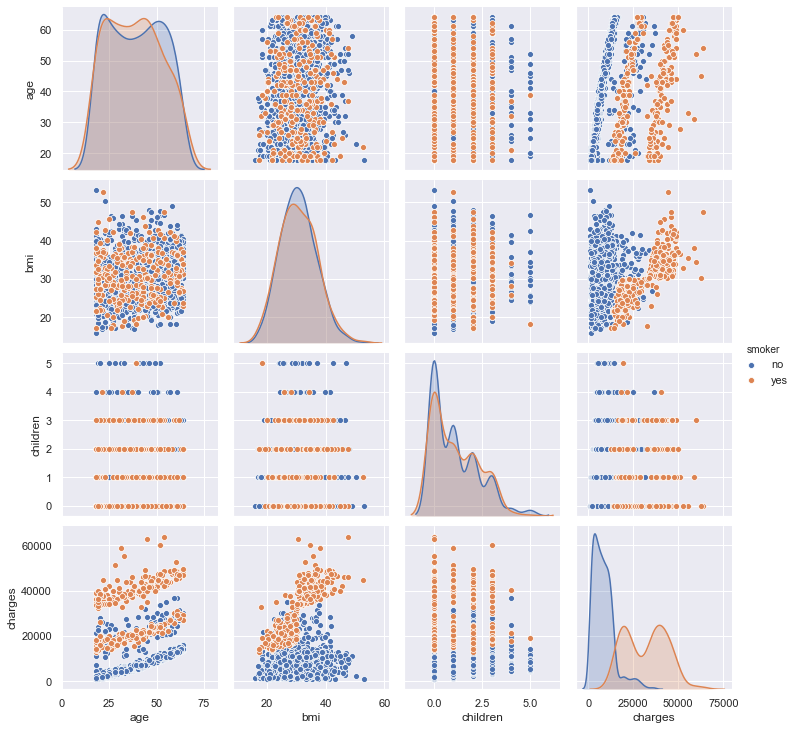

In [36]:
sns.pairplot(data, hue = 'smoker')
plt.show()

#### Of interest to statistical questions, the 'charges' distribution of non-smokers is very different, the median 'charge' of non-smokers looks to be much lower than smokers, and the smokers is higher but appears bimodal as well.  We'll also investigate 'bmi' and 'charges', as the the highest 'charges' are all smokers, while there seems to be a significant "cluster" of non-smokers with low to mid-range 'charges'.

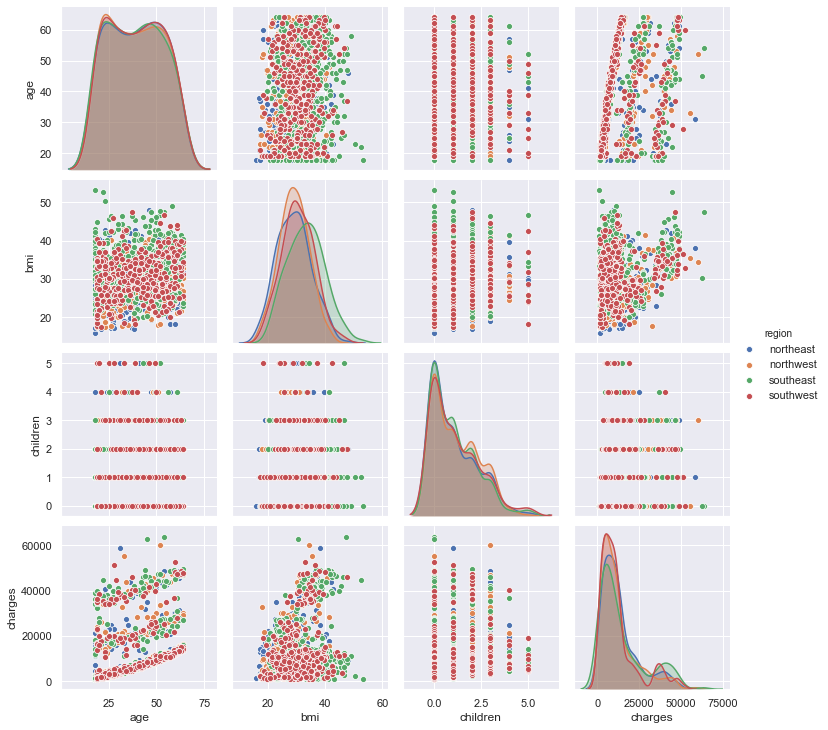

In [37]:
sns.pairplot(data, hue = 'region')
plt.show()

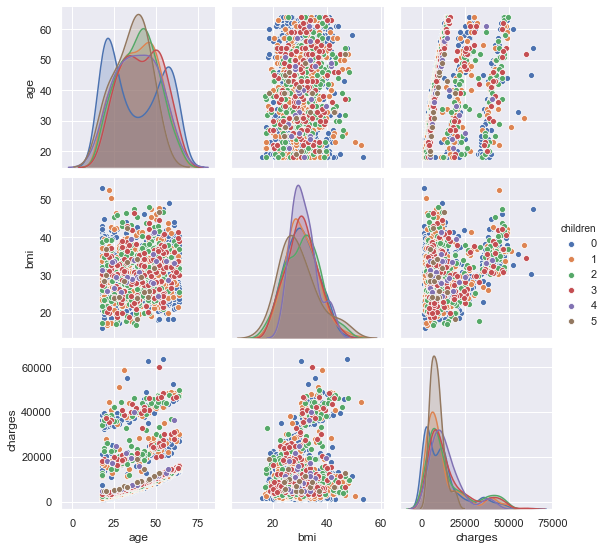

In [38]:
sns.pairplot(data, hue = 'children')
plt.show()

#### Visually, the mean 'bmi' of (females and males) with no children, one child and two children looks similar and may be statistically the same? We'll need to look at that in the statistics section.

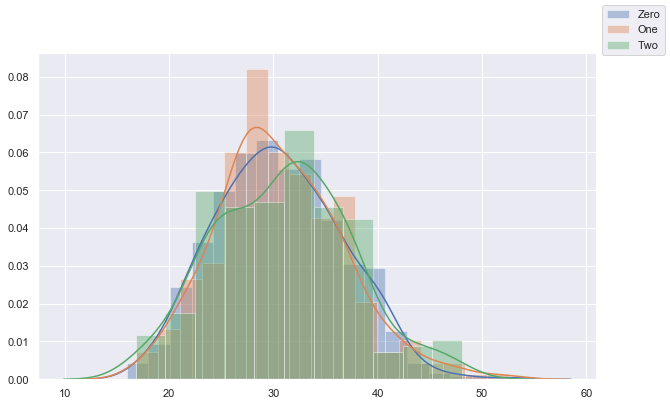

In [39]:
bmi0 = np.array(data[data['children'] == 0]['bmi'])
bmi1 = np.array(data[data['children'] == 1]['bmi'])
bmi2 = np.array(data[data['children'] == 2]['bmi'])
fig = plt.figure(figsize = (10,6))
sns.distplot(bmi0)
sns.distplot(bmi1)
sns.distplot(bmi2)
fig.legend(labels = ['Zero','One','Two'])

#### For the mean BMI's of (males and females) with zero, one or two children, they are similar, but we'll need to extract woman only in the statistics section. For completeness, we'll visually compare 'bmi' of males and females. 

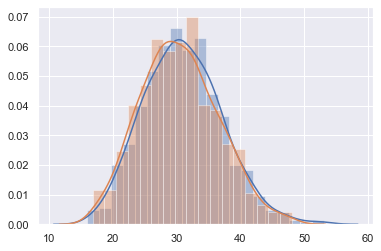

In [40]:
bmimale = np.array(data[data['sex'] == 'male']['bmi'])
bmifemale = np.array(data[data['sex'] == 'female']['bmi'])
sns.distplot(bmimale)
sns.distplot(bmifemale)
fig.legend(labels = ['male','female'])

##### It appears that the 'bmi' distributions of males and females is quite similar, and may be statistically the same; we test that in the questions.

#### Are the medical claims of people who smoke greater than those who don't?

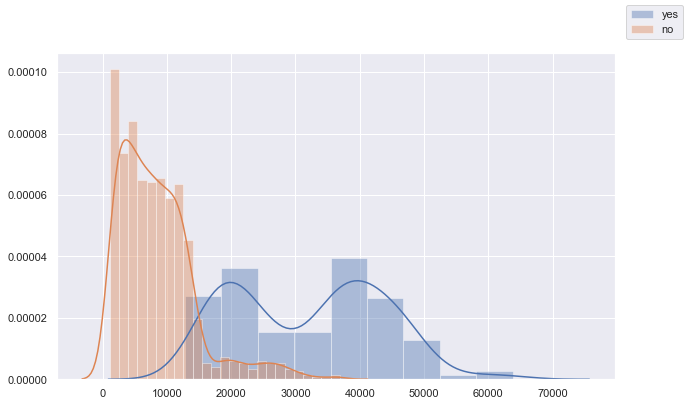

In [41]:
yes = np.array(data[data['smoker'] == 'yes']['charges'])
no = np.array(data[data['smoker'] == 'no']['charges'])
fig = plt.figure(figsize = (10,6))
sns.distplot(yes)
sns.distplot(no)
fig.legend(labels = ['yes', 'no'])

#### Now we can more clearly see, the 'charges' distribution of non-smokers is very different, the median 'charge' of non-smokers looks to be much lower than smokers, and the smokers is much higher but also appears to be bimodal.

#### From the heatmap, let's investigate 'bmi' with 'charges' and display 'smokers' 

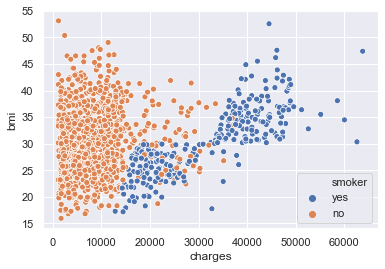

In [42]:
sns.scatterplot(y ='bmi', x = "charges", data = data, hue = 'smoker');

#### This scatterplot clearly shows key relationships for much higher 'charges' for people who have moderate to high 'bmi,' but are smokers! And it demonstrates that the outlier distribution of the highest 'charges' are clearly also from those who smoke.

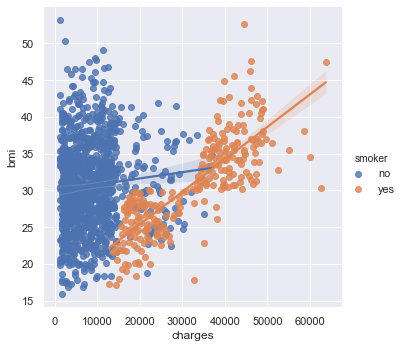

In [43]:
sns.lmplot(y = 'bmi', x = 'charges', hue = 'smoker', data = data);

In [44]:
min_smoker_charge = np.array(data[data['smoker'] == 'yes']['charges']).min()
max_smoker_charge = np.array(data[data['smoker'] == 'yes']['charges']).max()
print('Minimum Smoker charge is', min_smoker_charge,'Maximum Smoker charge is', max_smoker_charge,'Range =', max_smoker_charge - min_smoker_charge)

Minimum Smoker charge is 12829.4551 Maximum Smoker charge is 63770.42801 Range = 50940.972910000004


In [45]:
min_nsmoker_charge = np.array(data[data['smoker'] == 'no']['charges']).min()
max_nsmoker_charge = np.array(data[data['smoker'] == 'no']['charges']).max()
print('Minimum Non-smoker charge is', min_nsmoker_charge,'Maximum Non=smoker charge is', max_nsmoker_charge,'Range =', max_nsmoker_charge - min_nsmoker_charge)

Minimum Non-smoker charge is 1121.8739 Maximum Non=smoker charge is 36910.60803 Range = 35788.734130000004


In [46]:
extra_smoking_cost = max_smoker_charge - max_nsmoker_charge
extra_smoking_cost
print('Extra smokers cost above maximum non-smokers cost is', extra_smoking_cost)

Extra smokers cost above maximum non-smokers cost is 26859.81998


#### The 'lmplot' gives us regression lines to help us compare.  We can see that the Smokers line starts at a minimum of ~12,829, extends to a maximum of ~63,770, but the Smokers line has a much higher "slope" as compared to the Non-smoker line. The Non-smoker line starts at ~1,121 and only extends to ~36,910. While the number of Smokers is less, the extra charges above the Non-smokers is ~26,860 - these numbers, plus other analytic and statistic functions should be of concern for an insurance company and help inform a higher rate for smokers. 

#### From the heatmap, let's investigate 'age' with 'charges' and display 'smoker'

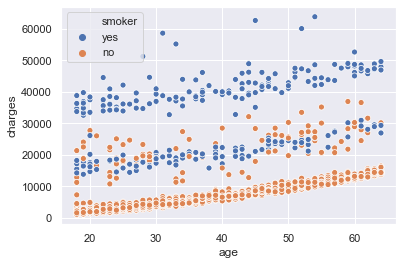

In [47]:
sns.scatterplot(y ='charges', x = "age", data = data, hue = 'smoker');

#### Yes, as expected 'charges' goes up with 'age', but the banding is facinating! The lower band is all non-smokers, the mid-band is the mix of smokers and non-smokers with more variablity for non-smokers, while the top band with the highest charges, are, of course, smokers.  The highest charges outliers for Smokers across the ages are clearly visible.

#### Let's look further at the question of 'smokers' by 'region.' 

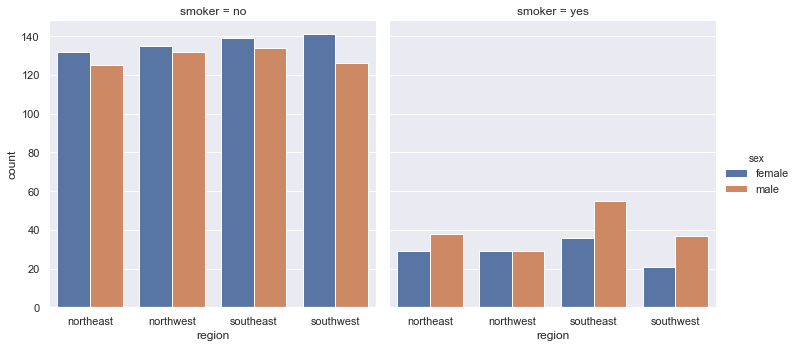

In [48]:
sns.catplot(x = 'region', data = data, kind = 'count', col = 'smoker', hue = 'sex');

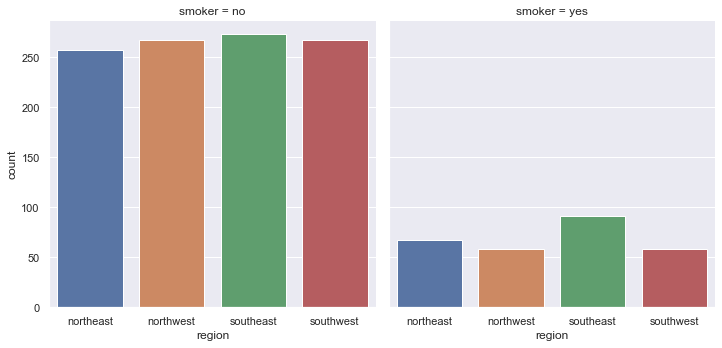

In [49]:
sns.catplot(x = 'region', data = data, kind = 'count', col = 'smoker');

#### From a proportionality point of view, visually, there seems to be much more 'proportional' variability across regions for smokers than non-smokers, despite the overall proportional difference of non-smokers 1064/1338 to smokers 274/1338.  We'll need to review this in the statistics testing section.

In [50]:
pd.crosstab(data['region'], data['smoker'], margins = True)

smoker,no,yes,All
region,,,
northeast,257,67,324
northwest,267,58,325
southeast,273,91,364
southwest,267,58,325
All,1064,274,1338


#### Let's look at smokers versus the number of children

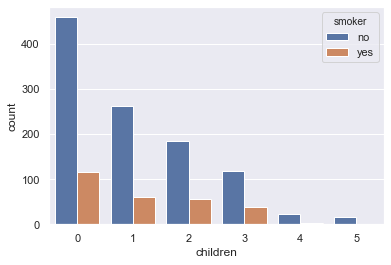

In [51]:
sns.countplot(data['children'],hue = data['smoker'])
plt.show()

In [52]:
pd.crosstab(data['children'], data['smoker'], margins = True )

smoker,no,yes,All
children,,,
0,459,115,574
1,263,61,324
2,185,55,240
3,118,39,157
4,22,3,25
5,17,1,18
All,1064,274,1338


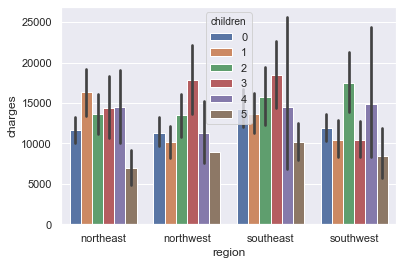

In [55]:
sns.barplot(data['region'], data['charges'], hue = data['children'])
plt.show()

### Answering the project's statistic questions, 2 through 5

#### Importing the required libraries for the following questions

In [70]:
from scipy.stats import ttest_1samp, ttest_ind, f_oneway, shapiro, wilcoxon # importing tests and 'normality checks' that could be used
from statsmodels.stats.power import ttest_power # calculating power of test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import statsmodels.api as sm
from statsmodels.formula.api import ols

### 2 / Prove (or disprove) that the medical claims made by people who smoke is greater than those who don't?
#### Null Hypothesis:               H0 = Smoking does not affect Insurance Charges
#### Alternative Hypothesis:    Ha = Smoking does affect Insurance Changes

#### Visually in the Multivariate section, we saw the 'charges' distribution of non-smokers is very different, the median 'charge' of non-smokers looks to be much lower than smokers, and the smokers is not only much higher, and includes high cost outliers, but also appears to be bimodal.

#### Referring to the Hypothesis Testing Roadmap, we have 'charges' continuous data, 2 samples, choose 2 sample independent t-test

#### Consider a significance level of 0.05 for questions 2 through 5

In [78]:
yes = np.array(data[data['smoker'] == 'yes']['charges']) # array of 'smokers' 'yes' from 'charges'
no = np.array(data[data['smoker'] == 'no']['charges'])   # array of 'non-smokers' 'no' from 'charges'
# using 2-sided t-test for independent samples, population SD unknown
t_statistic, p_value = stats.ttest_ind(yes, no)
print( 't_statistic =', t_statistic,'p_value =', p_value)
if p_value < 0.05:
    print("Reject Null Hypothesis, Smoking does have an effect on charges")
else:
    print("Fail to reject (accept) the Null Hypothesis, smoking might not have an effect on Charges")

t_statistic = 46.664921172723716 p_value = 8.271435842177219e-283
Reject Null Hypothesis, Smoking does have an effect on charges


### Therefore, we reject the null hypothesis based on our statistic test and the visualization above, smoking does have an effect on charges.

### 3 / Prove (or disprove) with statistical evidence that the BMI of females is different from that of males?

#### Null Hypothesis:        H0 = The bmi of males is not significantly different than that of females 
#### Alternative Hypothesis: Ha = The bmi of males is different than that of females 

#### Visually in the Multivariate section above, it appears that the 'bmi' distributions of males and females is quite similar, and may be statistically the same.

#### Referring to the Hypothesis Testing Roadmap, we have 'bmi' continuous data, 2 samples, choose 2 sample independent t-test

#### Consider a significance level of 0.05.

t_statistic = 1.696752635752224 p_value = 0.08997637178984932


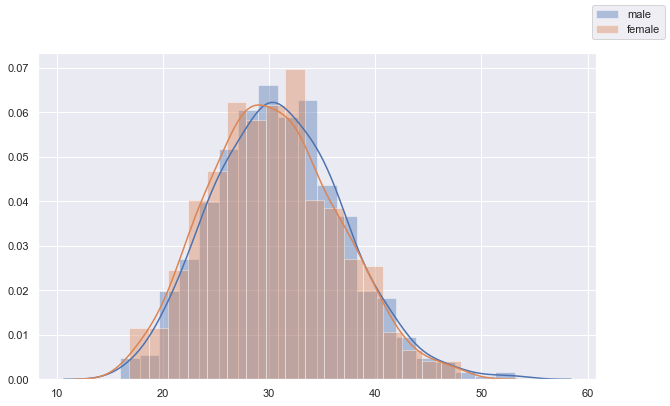

In [59]:
# from the visualization above 
bmimale = np.array(data[data['sex'] == 'male']['bmi'])     # array of 'males' from 'bmi'
bmifemale = np.array(data[data['sex'] == 'female']['bmi']) # array of 'famales' from 'bmi'
fig = plt.figure(figsize = (10,6))
sns.distplot(bmimale)
sns.distplot(bmifemale)
fig.legend(labels = ['male', 'female'])

# using the statistic test
t_statistic, p_value = stats.ttest_ind(bmimale, bmifemale)
print( 't_statistic =', t_statistic,'p_value =', p_value)

#### While the t_statistic is 1.697 sd away from the expected value, the p_value is compared to significance level of 0.05.

In [60]:
if p_value < 0.05:
    print('Reject null hypothesis, sex/gender does have an effect on bmi')
else:
    print('Fail to Reject, or "accept" null hypothesis, sex/gender has no statistical effect on bmi')

Fail to Reject, or "accept" null hypothesis, sex/gender has no statistical effect on bmi


### Therefore sex/gender has no statistical effect on bmi

### 4 / Is the proportion of smokers significantly different across different regions? 

#### Null Hypothesis:             H0 = The proportion of smokers is not significantly different across different regions
#### Alternative Hypothesis: Ha = The proportion of smokers is significantly different across different regions

#### Visually in the Multivariate section above, it appears that the proportion of smokers across the 4 regions looks to have more proportional variability from that of non-smokers,despite the overall proportional difference of non-smokers 1064/1338 to smokers 274/1338, however, we'll need to apply a test.

#### Referring to the Hypothesis Testing Roadmap, 'smokers' and 'region' are categorials and we 4 regions, so we'll need to use the Chi-square test

#### Consider a significance level of 0.05.

#### Create a contingency/crosstab of 'region' and 'smoker.'

In [61]:
pd.crosstab(data['region'], data['smoker'], margins = True)

smoker,no,yes,All
region,,,
northeast,257,67,324
northwest,267,58,325
southeast,273,91,364
southwest,267,58,325
All,1064,274,1338


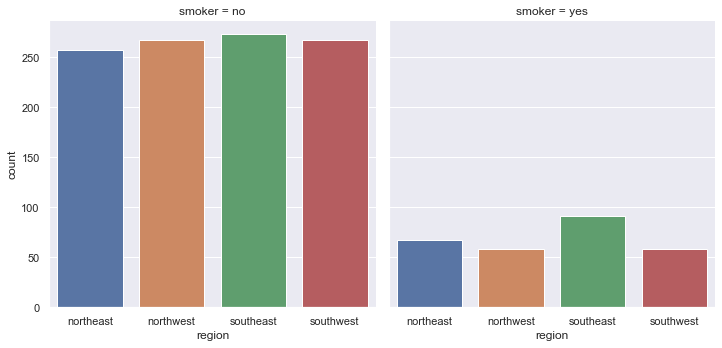

In [62]:
sns.catplot(x = 'region', data = data, kind = 'count', col = 'smoker'); # for visual review

In [63]:
df = pd.crosstab(data['region'], data['smoker'])
df = df.T
df

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [64]:
stats.chi2_contingency(df)

(7.34347776140707,
 0.06171954839170547,
 3,
 array([[257.65022422, 258.44544096, 289.45889387, 258.44544096],
        [ 66.34977578,  66.55455904,  74.54110613,  66.55455904]]))

In [65]:
chisquare = stats.chi2_contingency(df)[0] 
chisquare # this is the Chi-squared value

7.34347776140707

In [66]:
pval = stats.chi2_contingency(df)[1]
pval # this is the p_value

0.06171954839170547

In [67]:
dof = stats.chi2_contingency(df)[2]
dof # this is the degrees of freedom (dof)

3

In [71]:
from scipy.stats import chi2
significance = 0.05
p = 1 - significance
dof = chi2_contingency(df)[2]
critical_value = chi2.ppf(p, dof)
critical_value

7.814727903251179

### If the calculated Chi-square is greater than the critical value we reject the null hypothesis.

In [72]:
if chisquare > critical_value:
    print ('Reject the null hypothesis')
else:
    print ('Fail to reject (or accept) the null hypothesis')

Fail to reject (or accept) the null hypothesis


### Therefore the proportion of smokers is not significantly different across different regions.

### 5 / Is the mean BMI of of woman with no children, one child, and two children the same?

#### Null Hypothesis:             H0 = The mean BMI of of woman with no children, one child, and two children are the same
#### Alternative Hypothesis: Ha = The mean BMI of of woman with no children, one child, and two children are not the same

#### Referring to the Hypothesis Testing Roadmap, 'bmi' is continuous but we have more than 2 samples, so we can use analysis of variance (ANOVA) to determine whether the means are statistically the same (equality of means) or one or more is different. 

#### Consider a significance level of 0.05.

#### Creating a new dataframe 'bmifemale' of only females and 0, 1, and 2 children

In [73]:
bmifemale = data[(data['children'] <= 2) & (data['sex'] == 'female')][['sex','bmi', 'children']]
bmifemale.info() # checking dataframe creation 
bmifemale.head(10) # having a look at the first few rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   sex       566 non-null    category
 1   bmi       566 non-null    float64 
 2   children  566 non-null    int64   
dtypes: category(1), float64(1), int64(1)
memory usage: 13.9 KB


,sex,bmi,children
0,female,27.900,0
5,female,25.740,0
6,female,33.440,1
9,female,25.840,0
11,female,26.290,0
13,female,39.820,0
16,female,30.780,1
20,female,36.005,0
21,female,32.400,1
23,female,31.920,1


#### Creating 3 groups of 0, 1, and 2 children

In [74]:
zerochild = np.array(bmifemale[bmifemale['children'] == 0]['bmi'])
onechild  = np.array(bmifemale[bmifemale['children'] == 1]['bmi'])
twochild  = np.array(bmifemale[bmifemale['children'] == 2]['bmi'])

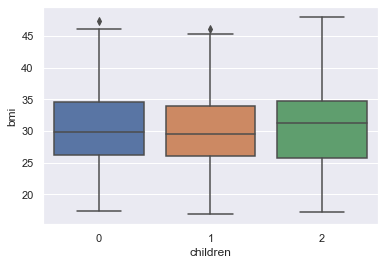

In [75]:
sns.boxplot(x = 'children', y = 'bmi', data = bmifemale);

#### Visually, given the samples from a population, the BMI distributions and means are relatively the same. We've already imported the right libraries from statsmodels, so below;

In [76]:
mod = ols('bmi ~ C(children)', data = bmifemale).fit()
aov_table = sm.stats.anova_lm(mod, typ = 2)
print(aov_table)

                   sum_sq     df         F    PR(>F)
C(children)     24.590123    2.0  0.334472  0.715858
Residual     20695.661583  563.0       NaN       NaN


###### From the table above ANOVA uses F-tests to statistically test the equality of means and the p_value ~ 0.716

In [77]:
if 0.716 > 0.05:
    print ('Fail to reject Null Hypothesis or in business terms, accept the Null Hypothesis')
else:
    print ('Reject the Null Hypothesis')

Fail to reject Null Hypothesis or in business terms, accept the Null Hypothesis


### Therefore, the means are statistically equal and the BMI for women with 0, 1 or 2 children is the same.

### END